In [45]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [46]:
df = pd.read_csv("segmentation_data.csv")
df.drop(["Unnamed: 0","ID"],axis=1,inplace=True)

In [47]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [48]:
df.iloc[:,2] , df["Age"]

(0       67
 1       22
 2       49
 3       45
 4       53
         ..
 1995    47
 1996    27
 1997    31
 1998    24
 1999    25
 Name: Age, Length: 2000, dtype: int64,
 0       67
 1       22
 2       49
 3       45
 4       53
         ..
 1995    47
 1996    27
 1997    31
 1998    24
 1999    25
 Name: Age, Length: 2000, dtype: int64)

<AxesSubplot:xlabel='Age', ylabel='Income'>

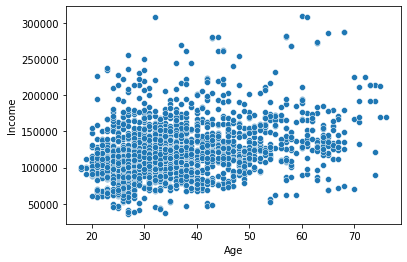

In [49]:
sns.scatterplot(x=df["Age"],y=df["Income"])


In [50]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.columns = ["Sex","Marital status","Age","Education","Income","Occupation","Settlement size"]

In [51]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [52]:
pca = PCA()
pca.fit(df_scaled)

PCA()

<AxesSubplot:>

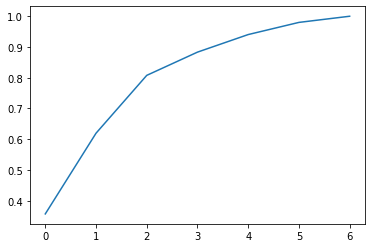

In [53]:
sns.lineplot(data=pca.explained_variance_ratio_.cumsum())

In [54]:
pca = PCA(n_components=3)
pca.fit(df_scaled)

PCA(n_components=3)

In [55]:
scores = pca.transform(df_scaled)

In [56]:
costs = []
for i in range(1,21):
    km = KMeans(n_clusters=i,init="k-means++",random_state=42)
    km.fit(scores)
    costs.append(km.inertia_)


<AxesSubplot:>

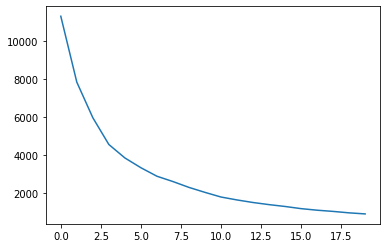

In [57]:
sns.lineplot(data=costs)

In [58]:
kmf =KMeans(n_clusters=4,init="k-means++",random_state=42)
kmf.fit(scores)

KMeans(n_clusters=4, random_state=42)

In [59]:
df["labels"] = kmf.labels_
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,labels
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


In [61]:
dt = pd.concat([df.reset_index(drop=True),pd.DataFrame(scores)],axis=1)
dt.columns.values[-3:] = ["comp-1","comp-2","comp-3"]
dt["labels"] = kmf.labels_
dt.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,labels,comp-1,comp-2,comp-3
0,0,0,67,2,124670,1,2,3,2.514746,0.834122,2.174806
1,1,1,22,1,150773,1,2,0,0.344935,0.598146,-2.211603
2,0,0,49,1,89210,0,0,2,-0.651063,-0.680093,2.280419
3,0,0,45,1,171565,1,1,1,1.714316,-0.579927,0.730731
4,0,0,53,1,149031,1,1,1,1.626745,-0.440496,1.244909


c:\Users\Chirag\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='comp-2', ylabel='comp-1'>

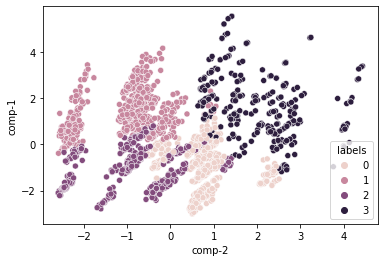

In [62]:
sns.scatterplot(dt["comp-2"],dt["comp-1"],hue=dt["labels"])

<AxesSubplot:xlabel='Age', ylabel='Income'>

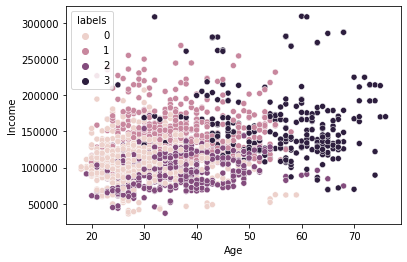

In [63]:
sns.scatterplot(x=dt["Age"],y=dt["Income"],hue=dt["labels"])
